<a href="https://colab.research.google.com/github/CheimaHMM/computer-vision/blob/main/facial_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
import pandas as pd
import numpy as np

## **Dataset Importing**

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 94% 268M/285M [00:03<00:00, 98.4MB/s]
100% 285M/285M [00:03<00:00, 90.7MB/s]


In [ ]:
! unzip /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip

Archive:  /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
icml_faces = pd.read_csv('/content/icml_face_data.csv')

## **Dataset exploration and preprocessing**

In [ ]:
icml_faces.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
icml_faces[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
len(icml_faces[' pixels'][0])

8287

In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []
for _ in range(len(icml_faces)) :
  image = np.fromstring(icml_faces[' pixels'].iloc[_], dtype=int, sep=' ')
  image = np.reshape(image, (48, 48, 1))
  if icml_faces[' Usage'][_] == 'Training' :
    x_train.append(image)
    y_train.append(icml_faces['emotion'][_])
  else :
    x_test.append(image)
    y_test.append(icml_faces['emotion'][_])

In [ ]:
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

Text(0.5, 1.0, '0')

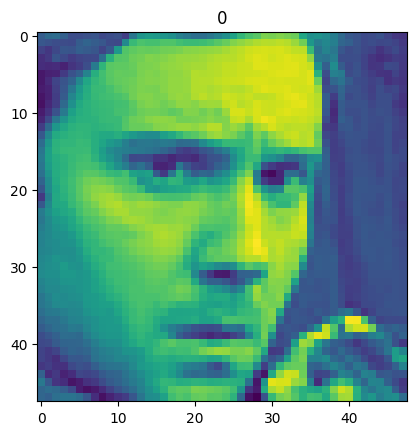

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])

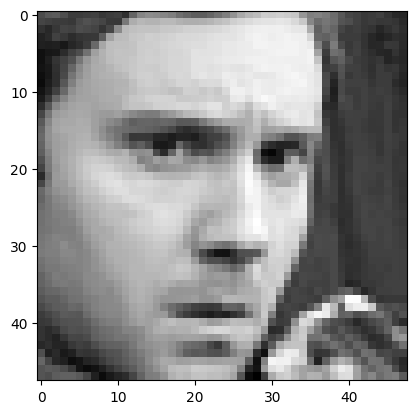

In [ ]:
plt.imshow(x_train[0],cmap='gray')

## **Modeling**

**simple CNN (only one convolution layer)**

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D, BatchNormalization, Input

model_CNN = Sequential()
model_CNN.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(48, 48, 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(7, activation='softmax'))
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_CNN = model_CNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
449/449 [==============================] - 22s 47ms/step - loss: 22.3347 - accuracy: 0.2566 - val_loss: 2.1283 - val_accuracy: 0.2859
Epoch 2/10
449/449 [==============================] - 22s 48ms/step - loss: 1.7075 - accuracy: 0.3872 - val_loss: 2.0880 - val_accuracy: 0.3058
Epoch 3/10
449/449 [==============================] - 33s 74ms/step - loss: 1.3973 - accuracy: 0.4868 - val_loss: 2.2293 - val_accuracy: 0.3162
Epoch 4/10
449/449 [==============================] - 21s 46ms/step - loss: 1.1927 - accuracy: 0.5602 - val_loss: 2.3952 - val_accuracy: 0.3252
Epoch 5/10
449/449 [==============================] - 27s 60ms/step - loss: 1.0316 - accuracy: 0.6196 - val_loss: 2.6696 - val_accuracy: 0.3330
Epoch 6/10
449/449 [==============================] - 24s 52ms/step - loss: 0.9045 - accuracy: 0.6695 - val_loss: 2.9155 - val_accuracy: 0.3353
Epoch 7/10
449/449 [==============================] - 26s 58ms/step - loss: 0.8111 - accuracy: 0.7069 - val_loss: 3.1408 - val_accuracy

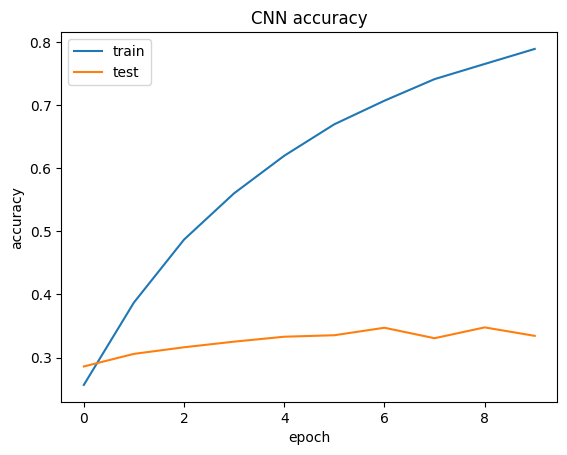

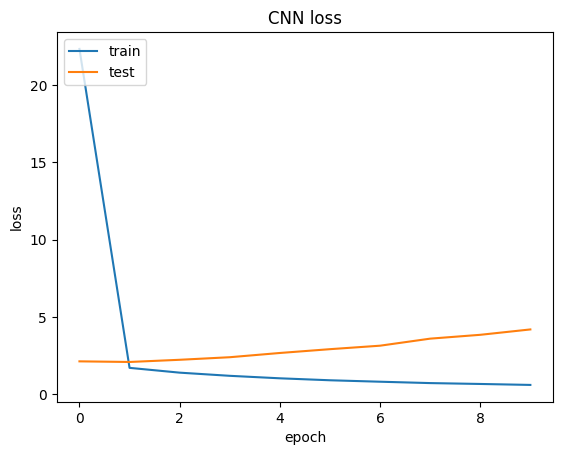

In [ ]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**VGG16**

In [ ]:
from keras.applications import VGG16
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model_VGG = Sequential()

model_VGG.add(Conv2D(3, (1, 1), padding='same', input_shape=(48, 48, 1)))

model_VGG.add(base_model)

model_VGG.add(Flatten())
model_VGG.add(Dense(7, activation='softmax'))

model_VGG.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
history_VGG = model_VGG.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
 79/449 [====>.........................] - ETA: 40:09 - loss: 1.8428 - accuracy: 0.2366

KeyboardInterrupt: ignored

**ResNet**

In [ ]:
from keras.applications import ResNet50


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model_ResNet = Sequential()

model_ResNet.add(Conv2D(3, (1, 1), padding='same', input_shape=(48, 48, 1)))

model_ResNet.add(base_model)

model_ResNet.add(Flatten())
model_ResNet.add(Dense(7, activation='softmax'))

model_ResNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_ResNet = model_ResNet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
449/449 [==============================] - 69s 72ms/step - loss: 1.5571 - accuracy: 0.4103 - val_loss: 1.4227 - val_accuracy: 0.4643
Epoch 2/50
449/449 [==============================] - 31s 69ms/step - loss: 1.3652 - accuracy: 0.4855 - val_loss: 1.8885 - val_accuracy: 0.2575
Epoch 3/50
449/449 [==============================] - 31s 68ms/step - loss: 1.3479 - accuracy: 0.4957 - val_loss: 1.6212 - val_accuracy: 0.3597
Epoch 4/50
449/449 [==============================] - 32s 70ms/step - loss: 1.3143 - accuracy: 0.5039 - val_loss: 1.3812 - val_accuracy: 0.4834
Epoch 5/50
449/449 [==============================] - 30s 66ms/step - loss: 1.2033 - accuracy: 0.5498 - val_loss: 1.3566 - val_accuracy: 0.4822
Epoch 6/50
449/449 [==============================] - 31s 69ms/step - loss: 1.2056 - accuracy: 0.5507 - val_loss: 1.2169 - val_accuracy: 0.5337
Epoch 7/50
449/449 [==============================] - 30s 66ms/step - loss: 1.0930 - accuracy: 0.5941 - val_loss: 1.3590 - val_accuracy:

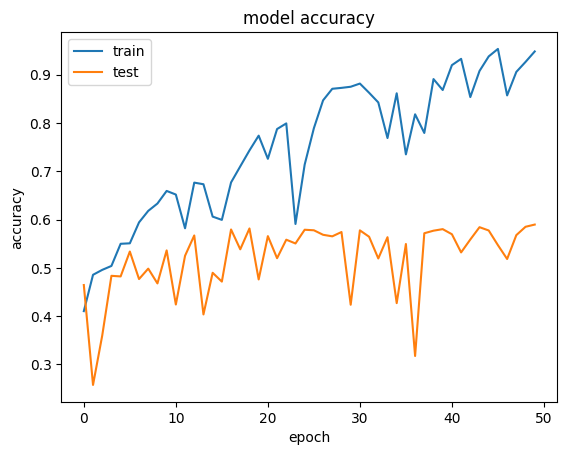

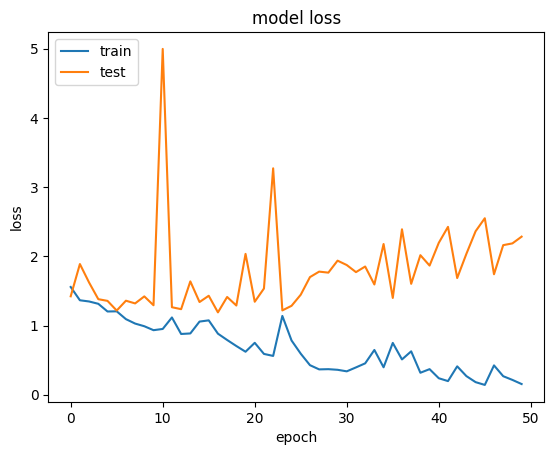

In [ ]:
plt.plot(history_ResNet.history['accuracy'])
plt.plot(history_ResNet.history['val_accuracy'])
plt.title('ResNet accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_ResNet.history['loss'])
plt.plot(history_ResNet.history['val_loss'])
plt.title('ResNet loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Create MobileNetV2 base model (excluding top layers)
base_model = MobileNetV2(input_shape=(48, 48, 3), weights='imagenet', include_top=False)

# Add custom layers for your task on top of MobileNetV2
model_MobNet = Sequential()
model_MobNet.add(Conv2D(3, (1, 1), padding='same', input_shape=(48, 48, 1)))
model_MobNet.add(base_model)
model_MobNet.add(GlobalAveragePooling2D())
model_MobNet.add(Dense(128, activation='relu'))
model_MobNet.add(Dropout(0.5))
model_MobNet.add(Dense(7, activation='softmax'))  # Replace num_classes with the number of classes in your dataset

# Compile the model
model_MobNet.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_MobNet= model_MobNet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
449/449 [==============================] - 51s 47ms/step - loss: 1.5973 - accuracy: 0.3873 - val_loss: 5.4047 - val_accuracy: 0.3158
Epoch 2/10
449/449 [==============================] - 19s 42ms/step - loss: 1.3361 - accuracy: 0.4991 - val_loss: 2.1582 - val_accuracy: 0.3780
Epoch 3/10
449/449 [==============================] - 19s 42ms/step - loss: 1.3155 - accuracy: 0.5082 - val_loss: 1.8772 - val_accuracy: 0.3064
Epoch 4/10
449/449 [==============================] - 19s 42ms/step - loss: 1.2068 - accuracy: 0.5514 - val_loss: 2.4063 - val_accuracy: 0.4466
Epoch 5/10
449/449 [==============================] - 19s 42ms/step - loss: 1.1564 - accuracy: 0.5656 - val_loss: 2.0952 - val_accuracy: 0.4908
Epoch 6/10
449/449 [==============================] - 18s 41ms/step - loss: 1.1501 - accuracy: 0.5712 - val_loss: 2.9254 - val_accuracy: 0.1624
Epoch 7/10
449/449 [==============================] - 18s 41ms/step - loss: 1.2442 - accuracy: 0.5321 - val_loss: 3.1820 - val_accuracy:

# **Intermediate layers results**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 45, 45, 8)         136       
                                                                 
 dropout (Dropout)           (None, 45, 45, 8)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 45, 45, 8)        32        
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 16200)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               2073728   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
from keras.models import Model

# Définir la couche dont vous souhaitez visualiser les activations intermédiaires
layer_name = 'conv2d_5'  # Nom de la couche que vous souhaitez visualiser

# Créer un modèle intermédiaire pour obtenir les sorties de la couche sélectionnée
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Obtenir les activations intermédiaires pour une image d'exemple
example_image = x_test[2]  # Sélectionner une seule image pour l'exemple

example_image = np.uint8(example_image)

#preprocessing of the image to predict
example_image = cv2.GaussianBlur(example_image,(5, 5), 0)

example_image = cv2.Canny(example_image, 50, 150)

example_image = np.reshape(example_image,(1,48,48))
activations = intermediate_layer_model.predict(example_image)

# Afficher les activations sous forme de cartes de chaleur
plt.figure(figsize=(8, 8))
for i in range(activations.shape[-1]):
    plt.subplot(6, 6, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='gray')
    plt.axis('off')

plt.imshow(x_test[2],cmap='gray')
plt.show()

ValueError: ignored